# Tratamento de Dados
<p>Realizaremos um tratamento dos dados visando a preparação para uma futura criação de um modelo preditivo de machine learning.

In [1]:
import pandas as pd
import pyarrow as pa
import fastparquet as fp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import locale

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
"""dados = pd.read_csv('spotify_songs.csv',encoding='utf-8', sep = ',',index_col=0)
dados.to_parquet('spotify_songs.parquet')"""
#Esse código está comentado pois só necessário apenas umas vez ser rodadado

"dados = pd.read_csv('spotify_songs.csv',encoding='utf-8', sep = ',',index_col=0)\ndados.to_parquet('spotify_songs.parquet')"

In [3]:
#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df= pd.read_parquet("spotify_songs.parquet")

In [5]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
#Colunas também são chamadas de variáveis.
df.shape

(32833, 22)

In [6]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
#Comando utilizado para verificar as linhas finais do DataFrame
df.tail()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,,
7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [8]:
# Converta as datas para objetos datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='%Y-%m-%d', errors='coerce')

In [21]:
# Extrair o ano da data de lançamento do álbum
df['album_year'] = pd.to_datetime(df['track_album_release_date']).dt.year

# Exibir as primeiras linhas do DataFrame com a nova feature
print(df[['track_album_release_date', 'album_year']].head())



                       track_album_release_date  album_year
track_id                                                   
6f807x0ima9a1j3VPbc7VN               2019-06-14      2019.0
0r7CVbZTWZgbTCYdfa2P31               2019-12-13      2019.0
1z1Hg7Vb0AhHDiEmnDE79l               2019-07-05      2019.0
75FpbthrwQmzHlBJLuGdC7               2019-07-19      2019.0
1e8PAfcKUYoKkxPhrHqw4x               2019-03-05      2019.0


track_id
5dnvWWkwwFJoDDc0QoSbvf    2018.0
1ydmI439o0pHe0e2TLpHUv    2008.0
3X3XuCPTC95ARm9SguWsIa    1992.0
5XrQLG0F2A5BsF6KfzGpL6    2018.0
31dqpLUModJWNbxrXu6TWd    1986.0
Name: year, dtype: float64


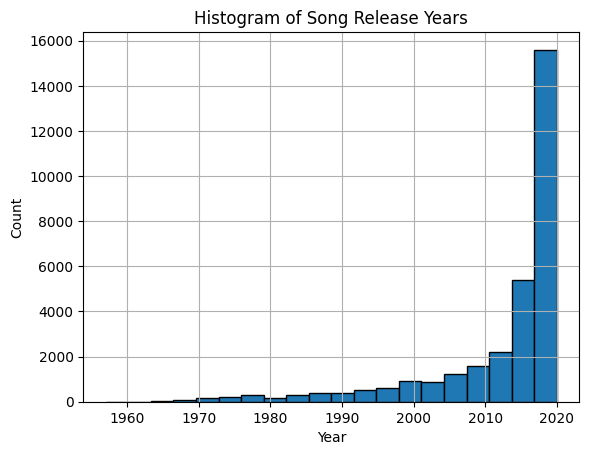

In [22]:
# Let's look at some examples
print(df['year'].sample(5))

# and create a histogram of the distribution of songs by year
df['year'].hist(bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Song Release Years')
plt.show()

In [11]:


# Calcule o mínimo e o máximo das datas
inicio = df['track_album_release_date'].min()
fim = df['track_album_release_date'].max()

print('Período dos dados - De:', inicio.date(), 'Até:', fim.date())


Período dos dados - De: 1957-01-01 Até: 2020-01-29


### PESSOAL O QUE VCS ACHAM DE EXCLUIR TODOS OS DADOS ANTERIORES DE 2019? SÓ AVALIAR DE JAN DE 2019 A DEZEMNRO DE 2019? 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_name                32828 non-null  object        
 1   track_artist              32828 non-null  object        
 2   track_popularity          32833 non-null  int64         
 3   track_album_id            32833 non-null  object        
 4   track_album_name          32828 non-null  object        
 5   track_album_release_date  30947 non-null  datetime64[ns]
 6   playlist_name             32833 non-null  object        
 7   playlist_id               32833 non-null  object        
 8   playlist_genre            32833 non-null  object        
 9   playlist_subgenre         32833 non-null  object        
 10  danceability              32833 non-null  float64       
 11  energy                    32833 non-null  float

In [13]:
#cria colunas de variáveis binárias para as colunas 'playlist_genre' e 'playlist_subgenre' no DataFrame 'df'. Cada valor categórico se torna uma nova coluna com 0s e 1s, o que é útil para análise de dados e modelagem de machine learning.
df = pd.get_dummies(df, columns=['playlist_genre', 'playlist_subgenre'])

In [14]:
# Normalização ou escalonamento de colunas numéricas (substitua 'scaler' pelo método apropriado)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["danceability", "energy", "loudness", "tempo"]] = scaler.fit_transform(
    df[["danceability", "energy", "loudness", "tempo"]]
)

In [15]:
"""# Remova colunas não necessárias (substitua 'colunas_a_remover' pelas colunas que deseja remover)
df = df.drop(columns=['colunas_a_remover'])
# Salve o dataset de volta (substitua 'seu_dataset_processado.csv' pelo nome desejado)
df.to_csv('seu_dataset_processado.csv', index=False)"""

"# Remova colunas não necessárias (substitua 'colunas_a_remover' pelas colunas que deseja remover)\ndf = df.drop(columns=['colunas_a_remover'])\n# Salve o dataset de volta (substitua 'seu_dataset_processado.csv' pelo nome desejado)\ndf.to_csv('seu_dataset_processado.csv', index=False)"

In [16]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df.isnull().sum()

track_name                                        5
track_artist                                      5
track_popularity                                  0
track_album_id                                    0
track_album_name                                  5
track_album_release_date                       1886
playlist_name                                     0
playlist_id                                       0
danceability                                      0
energy                                            0
key                                               0
loudness                                          0
mode                                              0
speechiness                                       0
acousticness                                      0
instrumentalness                                  0
liveness                                          0
valence                                           0
tempo                                             0
duration_ms 

In [17]:
# Observe agora que não temos mais nenhum valor em branco
df.isnull().sum()

track_name                                        5
track_artist                                      5
track_popularity                                  0
track_album_id                                    0
track_album_name                                  5
track_album_release_date                       1886
playlist_name                                     0
playlist_id                                       0
danceability                                      0
energy                                            0
key                                               0
loudness                                          0
mode                                              0
speechiness                                       0
acousticness                                      0
instrumentalness                                  0
liveness                                          0
valence                                           0
tempo                                             0
duration_ms 

In [18]:
# Vamos avaliar novamente os tipos das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   track_name                                   32828 non-null  object        
 1   track_artist                                 32828 non-null  object        
 2   track_popularity                             32833 non-null  int64         
 3   track_album_id                               32833 non-null  object        
 4   track_album_name                             32828 non-null  object        
 5   track_album_release_date                     30947 non-null  datetime64[ns]
 6   playlist_name                                32833 non-null  object        
 7   playlist_id                                  32833 non-null  object        
 8   danceability                               

In [19]:
df.shape

(32833, 51)

In [20]:
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_album rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.760936,0.915985,6,0.918090,1,0.0583,0.1020,0.000000,0.0653,0.518,0.509673,194754,2019.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.738555,0.814968,11,0.869162,1,0.0373,0.0724,0.004210,0.3570,0.693,0.417524,162600,2019.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.686673,0.930988,1,0.901368,0,0.0742,0.0794,0.000023,0.1100,0.613,0.517908,176616,2019.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.730417,0.929988,7,0.894118,1,0.1020,0.0287,0.000009,0.2040,0.277,0.509338,169093,2019.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.661241,0.832971,1,0.875385,1,0.0359,0.0803,0.000000,0.0833,0.725,0.517775,189052,2019.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
